# Equity cash dividend modelling

In [53]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from quant_analytics_torch.analytics import blackanalytics

In [96]:
F = torch.tensor(100.)
K = torch.tensor(100.)
D = torch.tensor(5.)
sigma_adj = torch.tensor(0.3)
sigma_phy = torch.tensor(0.3)
tau = torch.tensor(1.0)

In [97]:
black_v = blackanalytics.black(F-D,K-D,tau,sigma_adj)

In [98]:
blackanalytics.impliedvolatility(black_v, F, K, tau)

tensor(0.2849)

In [99]:
x = torch.linspace(-0.5,0.5,21)
strikes = F*torch.exp(x)

In [100]:
ivs = []
ivs_adj = []

for k in strikes:
    black_v = blackanalytics.black(F-D,k-D,tau,sigma_adj)
    ivs.append(blackanalytics.impliedvolatility(black_v, F, k, tau))
    
    black_p = blackanalytics.black(F,k,tau,sigma_phy)
    ivs_adj.append(blackanalytics.impliedvolatility(black_p, F-D, k-D, tau))
    
ivp = np.array(ivs)

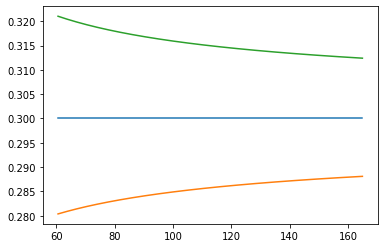

In [101]:
plt.plot(strikes, [sigma_adj]*len(strikes))
plt.plot(strikes, ivs)
plt.plot(strikes, ivs_adj)

In [102]:
1/2 * sigma_adj * D / F

tensor(0.0075)

In [103]:
(np.array(ivs)[1:]-ivs[:-1])/(x[1:]-x[:-1])

tensor([0.0105, 0.0102, 0.0098, 0.0095, 0.0091, 0.0088, 0.0085, 0.0082, 0.0079,
        0.0077, 0.0074, 0.0072, 0.0069, 0.0067, 0.0065, 0.0063, 0.0061, 0.0059,
        0.0057, 0.0055])

See also
[SSVI Calibration](./SSVICalibration.ipynb)